In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
img = image.load_img(r"C:\Users\prana\Desktop\New folder (2)\image_dataset\data\train\ambulance\00DWEUY37A15.jpg")

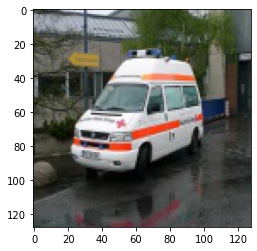

In [3]:
plt.imshow(img)

In [4]:
cv2.imread(r"C:\Users\prana\Desktop\New folder (2)\image_dataset\data\train\ambulance\00DWEUY37A15.jpg")

array([[[ 65,  66,  57],
        [ 59,  62,  53],
        [ 49,  57,  50],
        ...,
        [116, 119, 110],
        [121, 119, 111],
        [118, 116, 108]],

       [[ 65,  63,  55],
        [ 71,  72,  63],
        [ 76,  80,  74],
        ...,
        [117, 118, 109],
        [116, 117, 108],
        [117, 115, 107]],

       [[133, 125, 118],
        [106, 100,  93],
        [ 82,  79,  74],
        ...,
        [115, 116, 107],
        [115, 116, 107],
        [115, 116, 107]],

       ...,

       [[ 59,  61,  55],
        [ 65,  67,  61],
        [ 70,  70,  64],
        ...,
        [ 86,  83,  79],
        [ 97,  94,  90],
        [ 83,  80,  76]],

       [[ 64,  64,  58],
        [ 68,  68,  62],
        [ 66,  66,  60],
        ...,
        [ 91,  88,  84],
        [ 89,  86,  82],
        [ 91,  88,  84]],

       [[ 58,  58,  52],
        [ 60,  60,  54],
        [ 55,  55,  49],
        ...,
        [ 93,  90,  86],
        [ 84,  81,  77],
        [ 87,  84,  80]]

In [5]:

train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [20]:
train_dataset = train.flow_from_directory(r"C:\Users\prana\Desktop\New folder (2)\image_dataset\data\train",
                                          target_size=(200,200),batch_size =5,class_mode = 'binary')

validation_dataset = train.flow_from_directory(r"C:\Users\prana\Desktop\New folder (2)\image_dataset\data\val",
                                          target_size=(200,200),batch_size =5,class_mode = 'binary')

Found 4442 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


In [21]:
train_dataset.class_indices

{'ambulance': 0, 'no_ambulance': 1}

In [22]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation='relu'),

                                    tf.keras.layers.Dense(1,activation='sigmoid')

                                    
])

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [24]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=50,
                      validation_data= validation_dataset)

Epoch 1/50
5/5 [==============================] - 5s 901ms/step - loss: 7.5424 - accuracy: 0.2400 - val_loss: 0.5942 - val_accuracy: 0.7811
Epoch 2/50
5/5 [==============================] - 4s 838ms/step - loss: 0.5695 - accuracy: 0.7200 - val_loss: 2.4765 - val_accuracy: 0.2226
Epoch 3/50
5/5 [==============================] - 4s 808ms/step - loss: 0.7276 - accuracy: 0.7600 - val_loss: 0.9101 - val_accuracy: 0.2340
Epoch 4/50
5/5 [==============================] - 4s 815ms/step - loss: 0.6473 - accuracy: 0.6800 - val_loss: 0.5661 - val_accuracy: 0.8566
Epoch 5/50
5/5 [==============================] - 4s 857ms/step - loss: 0.5665 - accuracy: 0.7600 - val_loss: 0.4362 - val_accuracy: 0.9208
Epoch 6/50
5/5 [==============================] - 4s 764ms/step - loss: 0.4616 - accuracy: 0.7600 - val_loss: 1.6930 - val_accuracy: 0.2226
Epoch 7/50
5/5 [==============================] - 4s 775ms/step - loss: 0.5451 - accuracy: 0.8000 - val_loss: 0.2786 - val_accuracy: 0.9245
Epoch 8/50
5/5 [====

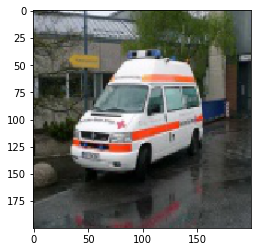

Ambulance


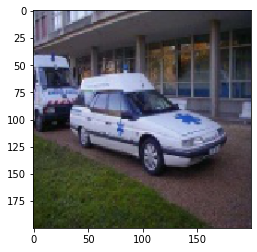

Ambulance


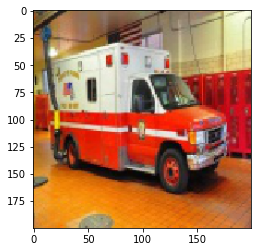

Ambulance


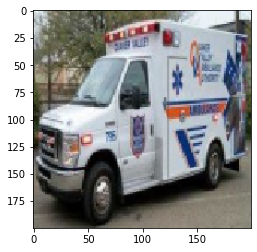

Ambulance


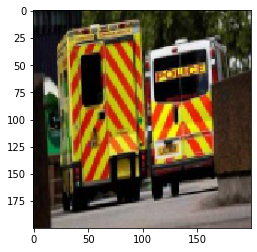

Ambulance


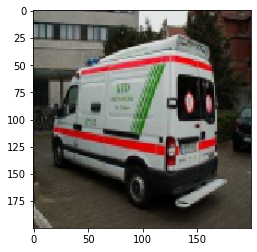

Ambulance


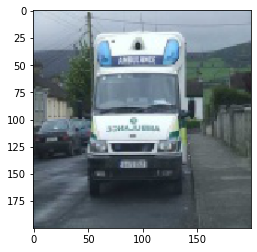

Ambulance


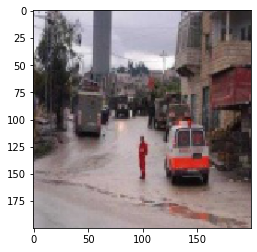

Ambulance


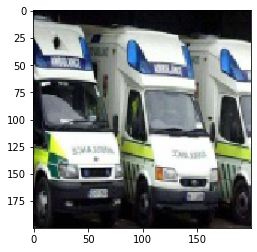

Ambulance


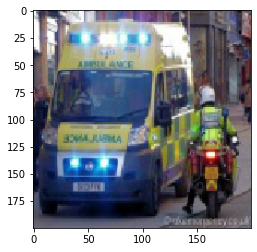

Ambulance


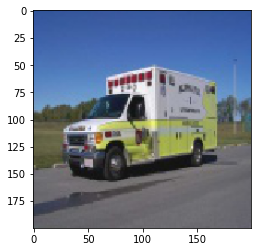

Ambulance


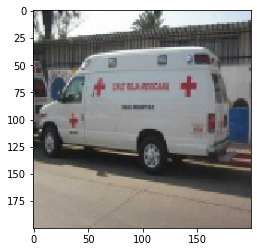

Not Ambulance


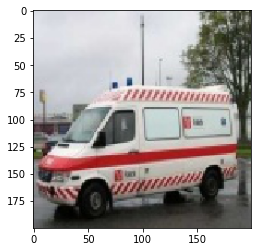

Ambulance


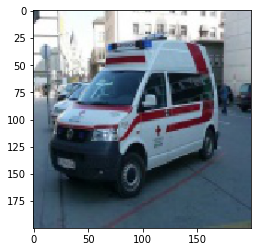

Ambulance


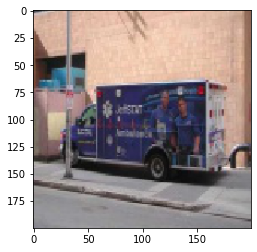

Ambulance


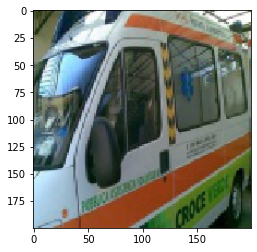

Ambulance


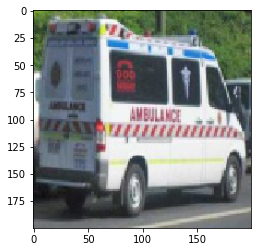

Not Ambulance


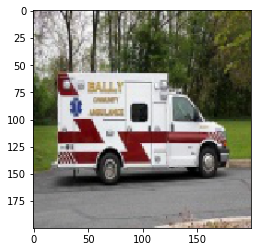

Ambulance


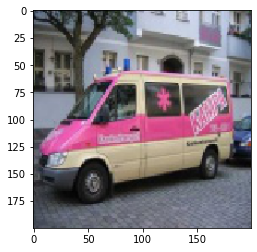

Ambulance


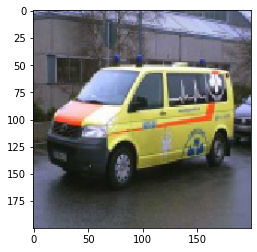

Ambulance


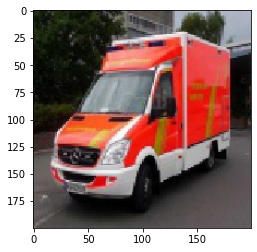

Ambulance


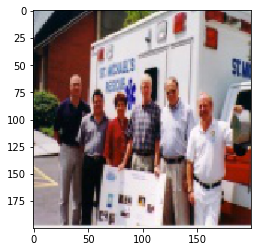

Ambulance


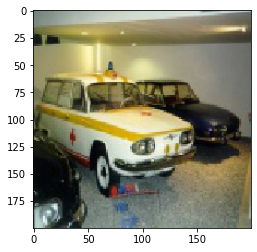

Ambulance


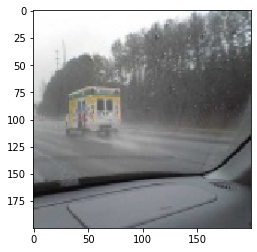

Not Ambulance


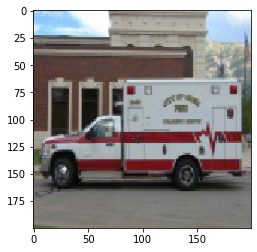

Ambulance


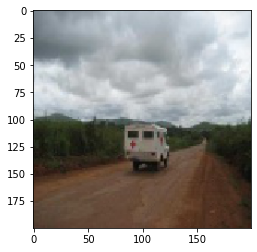

Ambulance


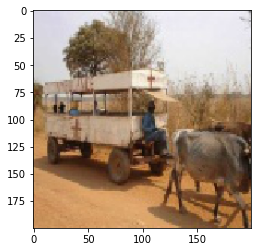

Ambulance


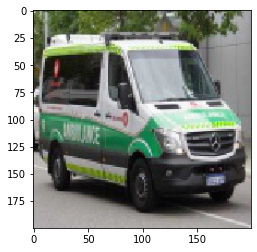

Ambulance


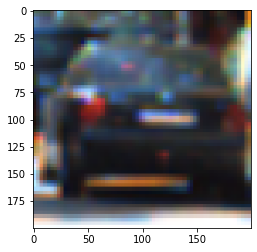

Not Ambulance


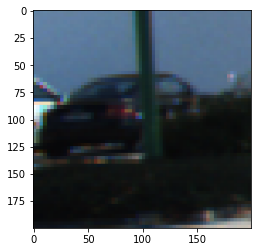

Not Ambulance


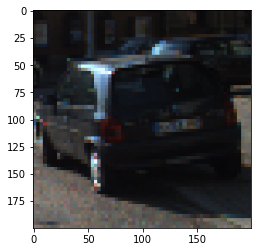

Not Ambulance


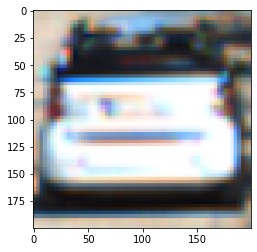

Not Ambulance


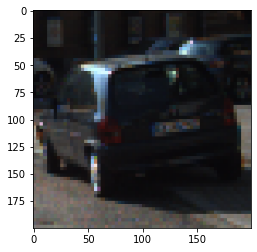

Not Ambulance


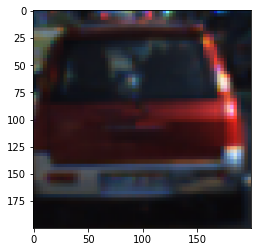

Not Ambulance


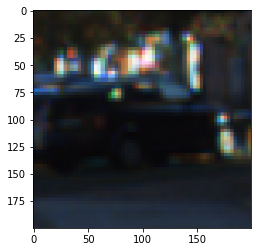

Not Ambulance


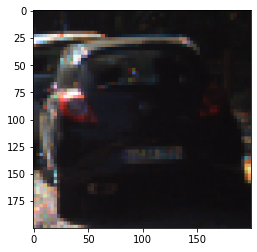

Not Ambulance


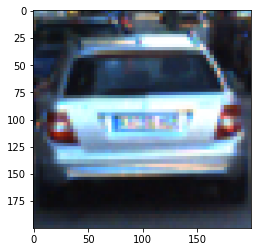

Not Ambulance


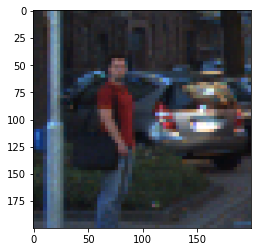

Not Ambulance


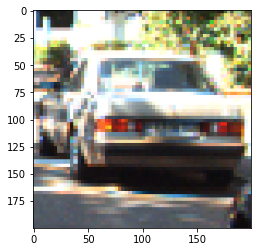

Not Ambulance


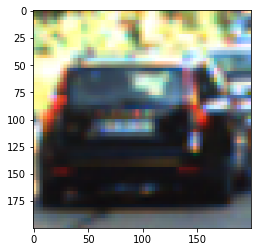

Not Ambulance


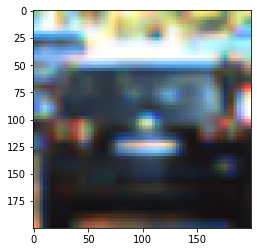

Not Ambulance


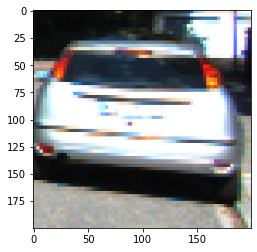

Not Ambulance


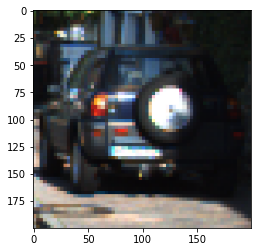

Ambulance


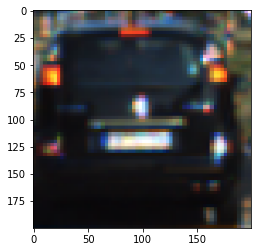

Not Ambulance


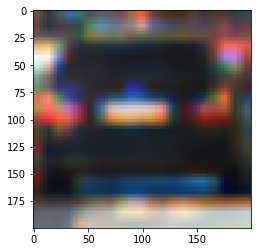

Not Ambulance


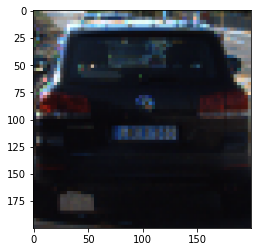

Not Ambulance


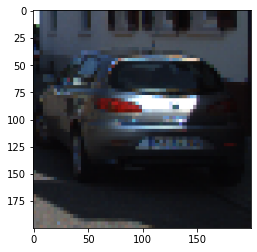

Not Ambulance


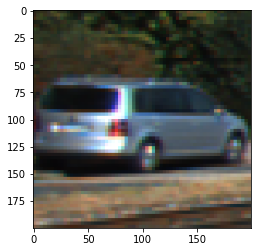

Ambulance


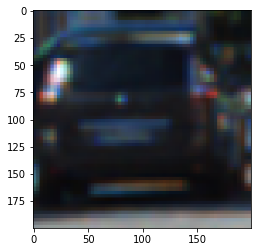

Not Ambulance


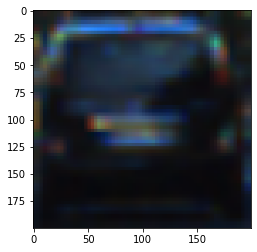

Not Ambulance


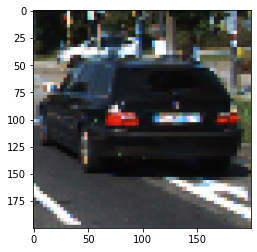

Not Ambulance


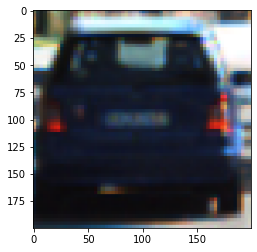

Not Ambulance


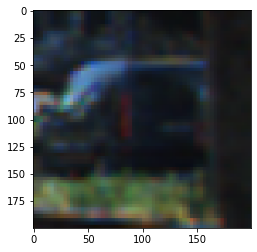

Not Ambulance


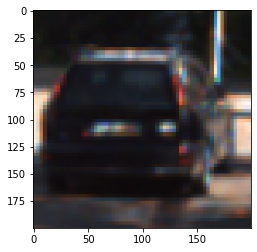

Not Ambulance


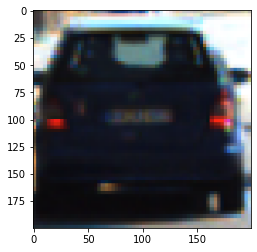

Not Ambulance


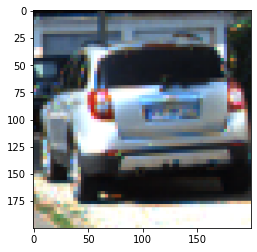

Not Ambulance


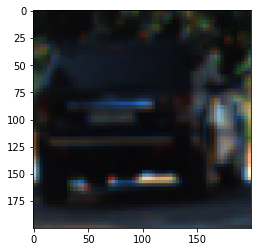

Not Ambulance


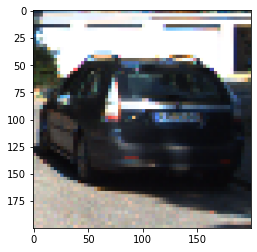

Not Ambulance


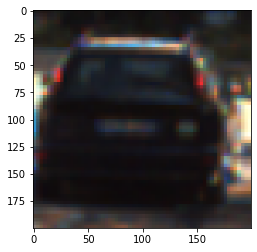

Not Ambulance


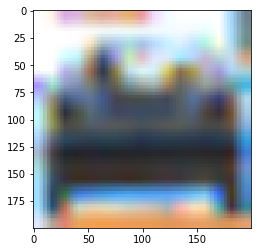

Not Ambulance


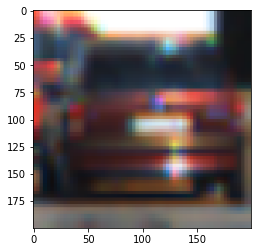

Not Ambulance


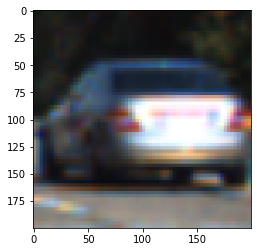

Not Ambulance


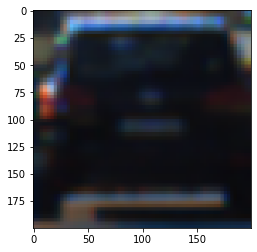

Not Ambulance


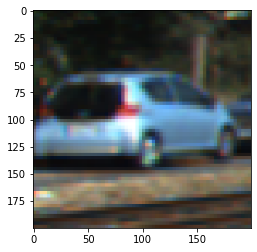

Not Ambulance


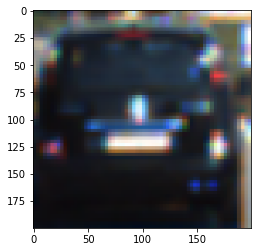

Not Ambulance


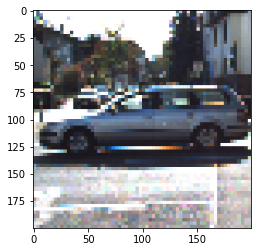

Not Ambulance


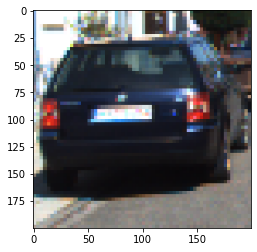

Not Ambulance


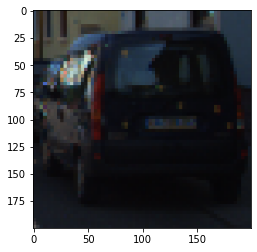

Not Ambulance


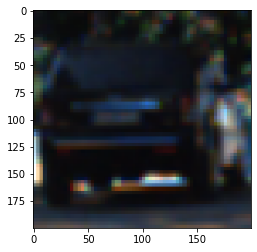

Not Ambulance


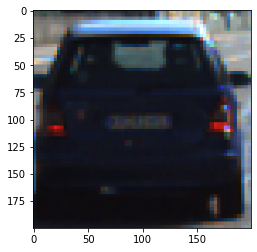

Not Ambulance


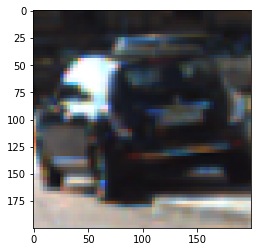

Not Ambulance


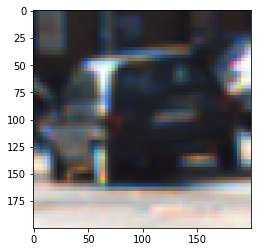

Not Ambulance


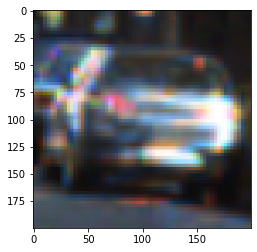

Not Ambulance


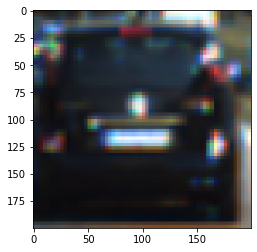

Not Ambulance


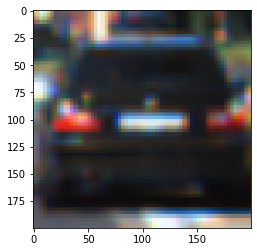

Not Ambulance


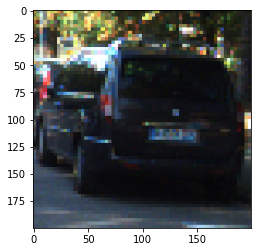

Not Ambulance


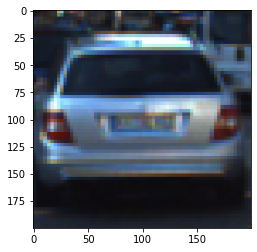

Not Ambulance


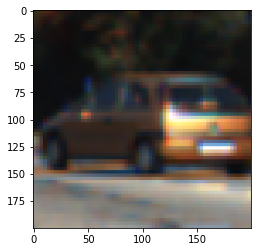

Ambulance


In [25]:
dir_path = r"C:\Users\prana\Desktop\New folder (2)\image_dataset\data\test"
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print("Ambulance")
  else:
    print("Not Ambulance")


In [26]:
model.save("myModel.h5") # saving the model